In [25]:
# Import all the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore small warnings
import warnings
warnings.filterwarnings('ignore')

print('Libraries imported successfully!')

Libraries imported successfully!


1. Read Data file

In [3]:
vg_sales = pd.read_csv('Game_Sales.csv', index_col = False)
vg_sales.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [27]:
print(f'This DataFrame has total of {vg_sales.shape[0]} rows and total of {vg_sales.shape[1]} columns')

This DataFrame has total of 16598 rows and total of 11 columns


In [5]:
# A brief Data analysis

print("Information of the Dataset".upper())
print("="*60)

vg_sales.info()


INFORMATION OF THE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [6]:
# Statistical Description of the Numerical columns of Dataset

print('Statistical View of the Dataset'.upper())
print("="*60)

vg_sales.describe()

STATISTICAL VIEW OF THE DATASET


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.409326,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.820108,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


2. Analysis of missing values

In [92]:
# Function to find the total missing values per column of DataFrame

def find_missing(data):
    
    missing = data.isna().sum()
    percentage = ((missing / len(data))*100).round(2)

    report = pd.DataFrame({
            'Missing' : missing,
            'Percentage(%)' : percentage
        })

    return report[report['Missing'] > 0]
        
missing_report = find_missing(vg_sales)
print('MISSING VALUES REPORT')
print('='*60)
print(missing_report)

MISSING VALUES REPORT
           Missing  Percentage(%)
Year           271           1.63
Publisher       58           0.35


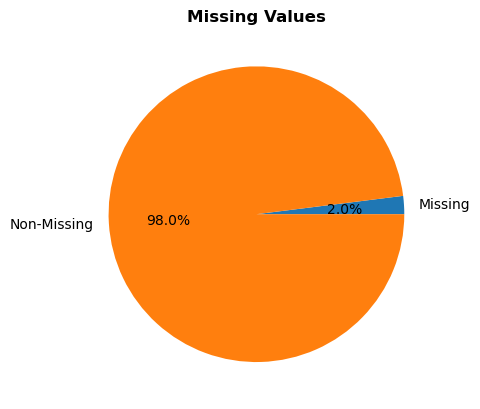

The Total Number of Missing values is 329 which is about 1.98% of the Dataset


In [55]:
# Show-casing missing values with pie chart

total_missing = vg_sales.isna().sum().sum()
non_missing = len(vg_sales) - total_missing
pct = ((total_missing / len(vg_sales)) * 100).round(2)

plt.pie([total_missing , non_missing] ,labels = ['Missing' , 'Non-Missing'] , autopct = '%.1f%%')
plt.title("Missing Values" , fontweight = 'bold')
plt.show()

print(f'The Total Number of Missing values is {total_missing} which is about {pct}% of the Dataset')

3. Handling Missing Values

In [9]:
# Forward filling the missing values of 'Year' and converting it into 'int64' from 'float64'

vg_sales['Year'] = vg_sales['Year'].ffill()
vg_sales['Year'] = vg_sales['Year'].astype('int64')

# Replacing with the word 'Unknown' in NAN places of 'Publisher' column

vg_sales['Publisher'] = vg_sales['Publisher'].fillna('Unknown')


In [10]:
# Missing Report after handling NAN values

missing_report = find_missing(vg_sales)
print('MISSING VALUES REPORT AFTER HANDLING MISSING VALUES')
print('='*60)
print(missing_report)

MISSING VALUES REPORT AFTER HANDLING MISSING VALUES
Empty DataFrame
Columns: [Missing, Percentage(%)]
Index: []


4. Space optimisation for the Data set

In [11]:
# Finding number of unique values

cols = vg_sales.columns

for col in cols:
    print(f"Column '{col}' has {vg_sales[col].nunique()} unique values")

Column 'Rank' has 16598 unique values
Column 'Name' has 11493 unique values
Column 'Platform' has 31 unique values
Column 'Year' has 39 unique values
Column 'Genre' has 12 unique values
Column 'Publisher' has 578 unique values
Column 'NA_Sales' has 409 unique values
Column 'EU_Sales' has 305 unique values
Column 'JP_Sales' has 244 unique values
Column 'Other_Sales' has 157 unique values
Column 'Global_Sales' has 623 unique values


In [12]:
memory_used = (vg_sales.memory_usage(deep = True).sum() / (1024 ** 2)).round(2)

print(f'The memory used by the dataset before the optimisation is {memory_used} MB')

The memory used by the dataset before the optimisation is 4.74 MB


In [13]:
# Converting columns to categorical cololumns

def to_category(data):
    cols = data.columns

    for col in cols:
        if data[col].nunique() < 40:
            data[col] = data[col].astype('category')


to_category(vg_sales)

In [17]:
memory_used_after = (vg_sales.memory_usage(deep = True).sum() / (1024 ** 2)).round(2)

print(f'The memory used by the dataset after the optimisation is {memory_used_after} MB')
print(f'And we saved approximately {(memory_used - memory_used_after).round(2)} MB')

The memory used by the dataset after the optimisation is 2.96 MB
And we saved approximately 1.78 MB


5. Top Genres Analysis

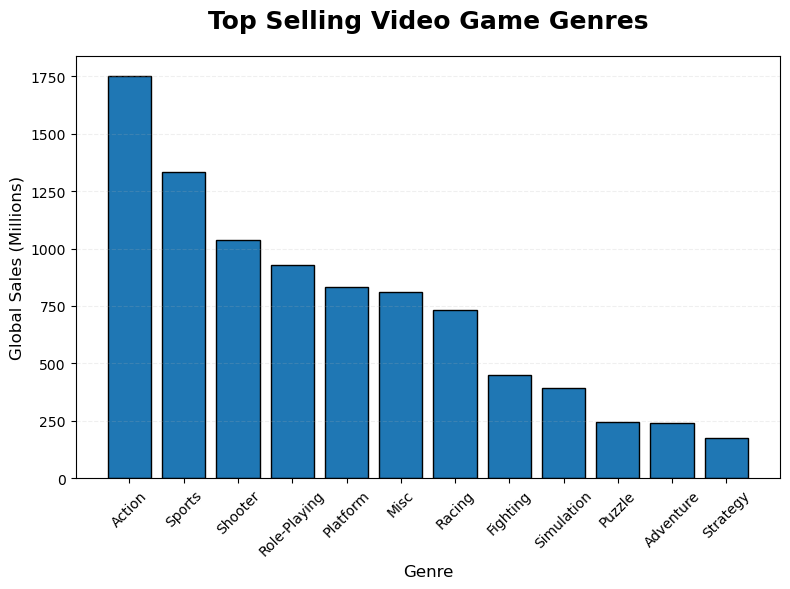

In [15]:
# Top genere globally

top_genre = vg_sales.groupby('Genre').Global_Sales.sum().sort_values(ascending = False)

plt.figure(figsize=(8, 6))
plt.bar(top_genre.index , top_genre.values , edgecolor = 'black')
plt.title("Top Selling Video Game Genres", fontsize=18, fontweight='bold' , pad = 20)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Global Sales (Millions)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()

6. Regional Analysis

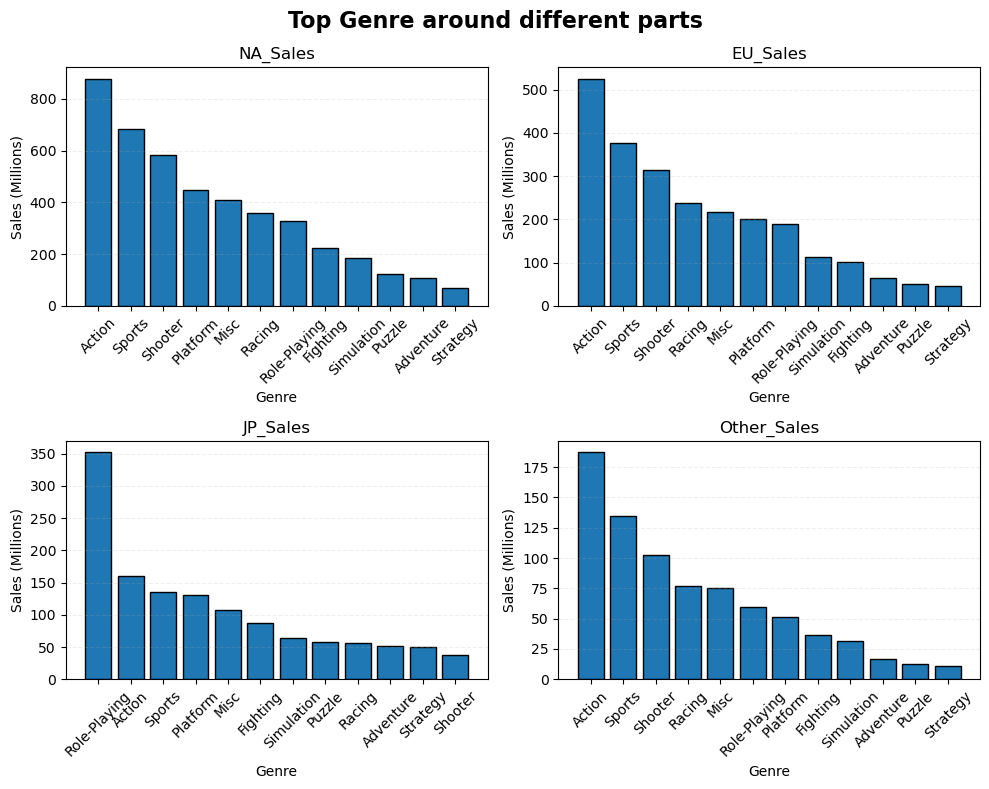

In [16]:
# top genre across different parts of the world

parts = vg_sales.columns[6 : 10]

fig , axs = plt.subplots(2,2 , figsize = (10 , 8))
fig.suptitle('Top Genre around different parts' , fontweight = 'bold' , fontsize = 16)
axs = axs.flatten()

for i,part in enumerate(parts):
    top_g = vg_sales.groupby('Genre')[part].sum().sort_values(ascending = False)

    axs[i].bar(top_g.index , top_g.values ,  edgecolor = 'black')
    axs[i].set_title(part)
    axs[i].set_xlabel('Genre')
    axs[i].set_ylabel('Sales (Millions)')
    axs[i].tick_params(axis = 'x', rotation = 45)
    axs[i].grid(axis='y', linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()
    

7. Temporal Sales Tracking

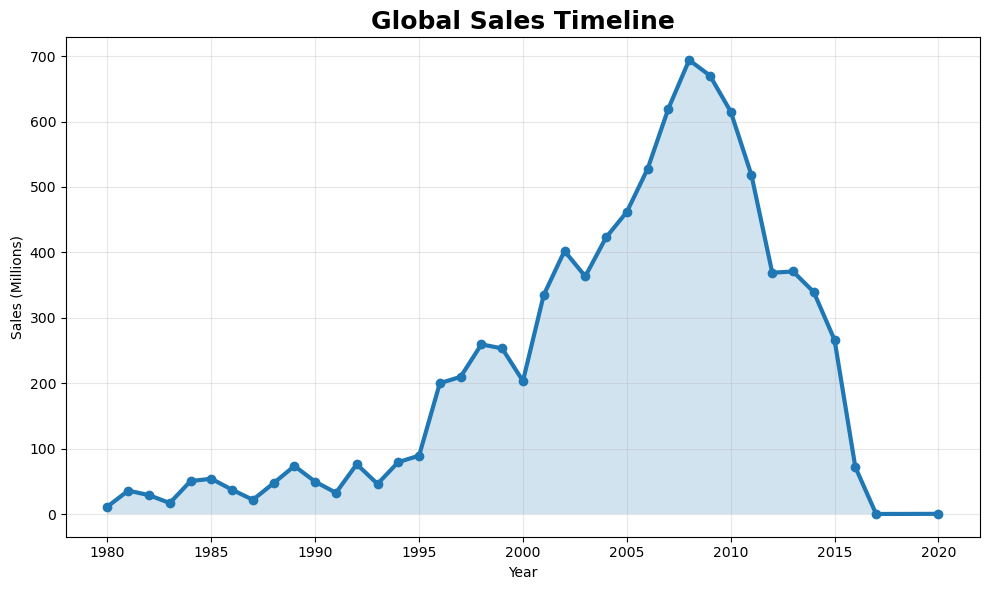

In [40]:
# Detecting the "Golden Age" of gaming.

sales_year = vg_sales.groupby('Year').Global_Sales.sum()

plt.figure(figsize = (10 , 6))

plt.plot(sales_year.index ,sales_year.values , marker = 'o' , linewidth = 3 , markersize = 6)
plt.fill_between(sales_year.index, sales_year.values, alpha=0.2)
plt.title("Global Sales Timeline", fontsize=18, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()


8. Market Giants : Publishers & Platforms

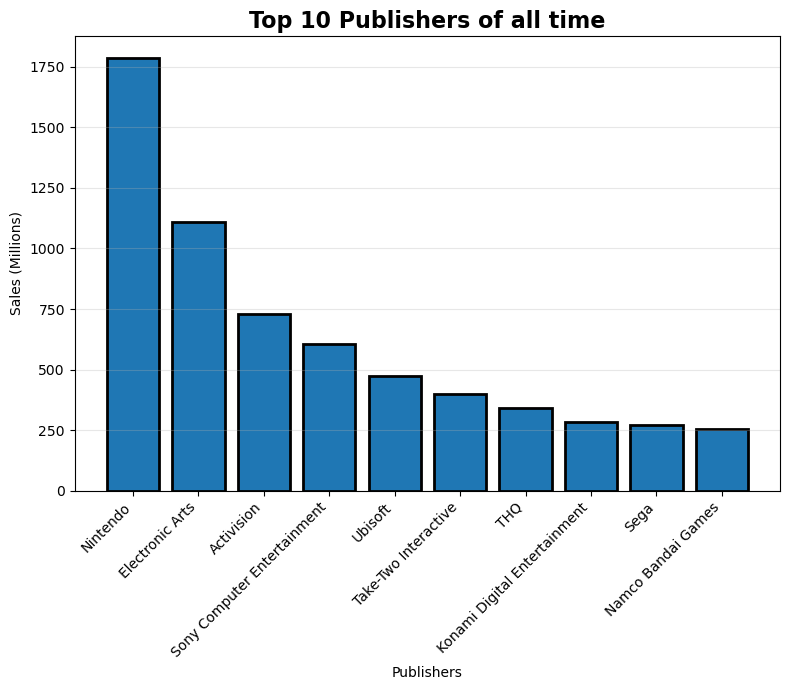

In [48]:
# Top10 publishers of games

top10_publishers = vg_sales.groupby('Publisher').Global_Sales.sum().sort_values(ascending = False).head(10)

plt.figure(figsize = (8 , 7))
plt.bar(top10_publishers.index , top10_publishers.values , linewidth = 2 , edgecolor = 'black')
plt.title('Top 10 Publishers of all time' , fontsize= 16 , fontweight = 'bold')
plt.xlabel('Publishers' , fontsize = 10)
plt.ylabel('Sales (Millions)', fontsize = 10)
plt.xticks(rotation = 45 , ha='right')
plt.grid(axis = 'y' , alpha = 0.3)
plt.tight_layout()
plt.show()

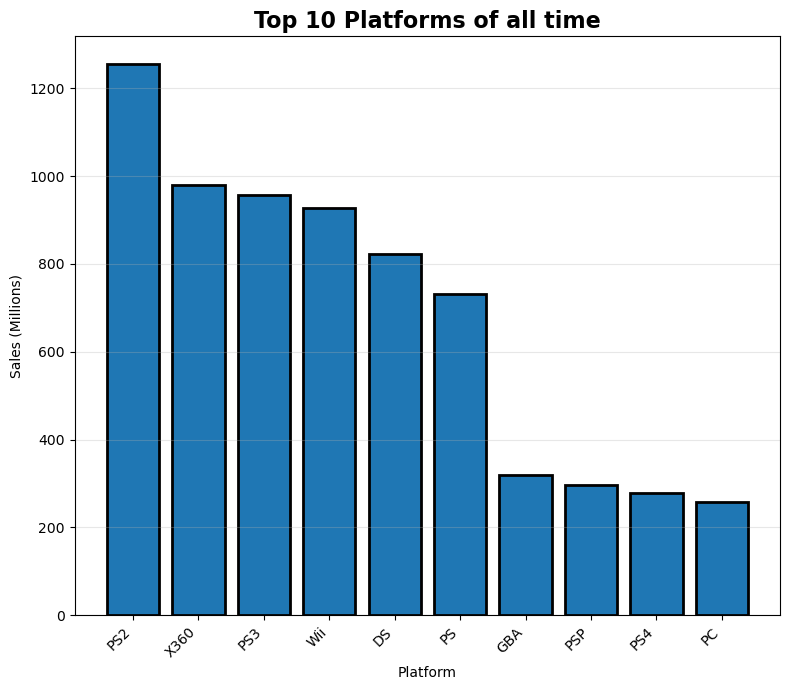

In [49]:
# Top 10 platforms
top10_platforms = vg_sales.groupby('Platform').Global_Sales.sum().sort_values(ascending = False).head(10)

plt.figure(figsize = (8 , 7))
plt.bar(top10_platforms.index , top10_platforms.values , linewidth = 2 , edgecolor = 'black')
plt.title('Top 10 Platforms of all time' , fontsize= 16 , fontweight = 'bold')
plt.xlabel('Platform' , fontsize = 10)
plt.ylabel('Sales (Millions)', fontsize = 10)
plt.xticks(rotation = 45 , ha='right')
plt.grid(axis = 'y' , alpha = 0.3)
plt.tight_layout()
plt.show()

9. Global Market Share(Genre)

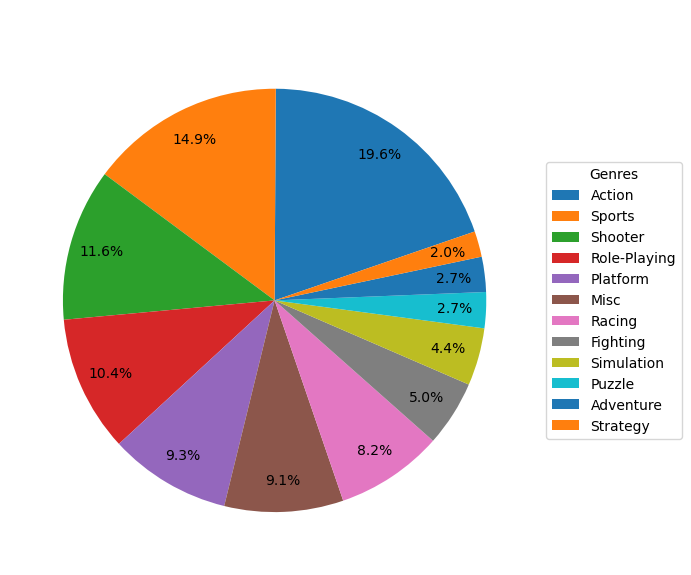

In [83]:
# Market share of Genre
plt.figure(figsize = (7, 7))
plt.pie(top_genre.values , labels = None , autopct = '%.1f%%' ,pctdistance=0.85, startangle = 19)
plt.legend(top_genre.index, title="Genres", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Market Share by Genre", fontsize=16, color='white', fontweight='bold')
plt.tight_layout()
plt.show()

10. Detecting outliers in Sales

PLOTTING FOR OUTLIERS


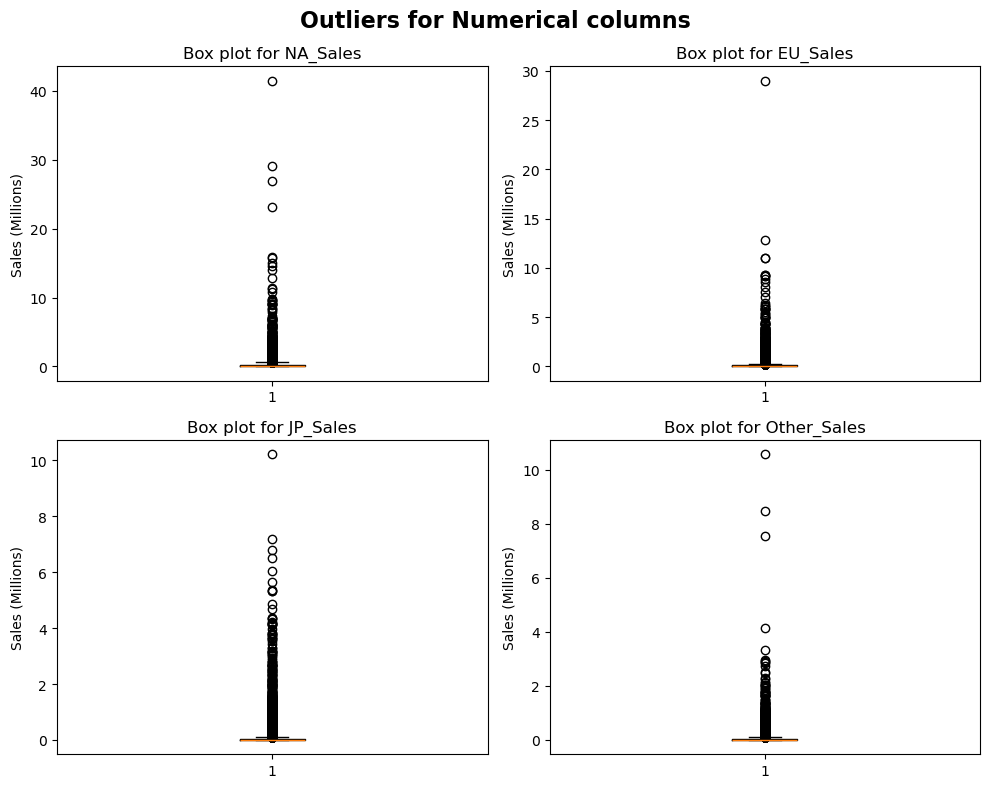



OUTLIERS BOUNDS
NA_Sales Outliers:
Total Outliers: 1681
lower bound : -0.36
Upper bound : 0.6
Outlier percentage : 10.13%


EU_Sales Outliers:
Total Outliers: 2081
lower bound : -0.165
Upper bound : 0.275
Outlier percentage : 12.54%


JP_Sales Outliers:
Total Outliers: 2425
lower bound : -0.06
Upper bound : 0.1
Outlier percentage : 14.61%


Other_Sales Outliers:
Total Outliers: 1665
lower bound : -0.06
Upper bound : 0.1
Outlier percentage : 10.03%




In [42]:
def detect_outliers(data , col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - IQR*1.5 
    upper_bound = Q3 + IQR*1.5

    outlier = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    return outlier , lower_bound , upper_bound

# Defining Numerical columns
numerical_cols = vg_sales.columns[6 : 10] 

print("Plotting for Outliers".upper())
print("="*60)
fig , axs = plt.subplots(2,2,figsize = (10 , 8))
axs = axs.flatten()

fig.suptitle("Outliers for Numerical columns", fontweight = 'bold' , fontsize = 16)

for i,col in enumerate(numerical_cols):
    axs[i].boxplot(vg_sales[col].dropna())
    axs[i].set_title(f'Box plot for {col}')
    axs[i].set_ylabel('Sales (Millions)')

plt.tight_layout()
plt.show()

print('\n')
print('Outliers bounds'.upper())
print('='*60)
for col in numerical_cols:
    outliers , lb , ub = detect_outliers(vg_sales , col)
    outlier_pct = round((len(outliers)  / len(vg_sales))*100 ,2)
    print(f'{col} Outliers:')
    print('='*60)
    print(f'Total Outliers: {len(outliers)}')
    print(f'lower bound : {lb}')
    print(f'Upper bound : {ub}')
    print(f'Outlier percentage : {outlier_pct}%')
    print('\n')


11. Quick Analysis of 'Nintendo'

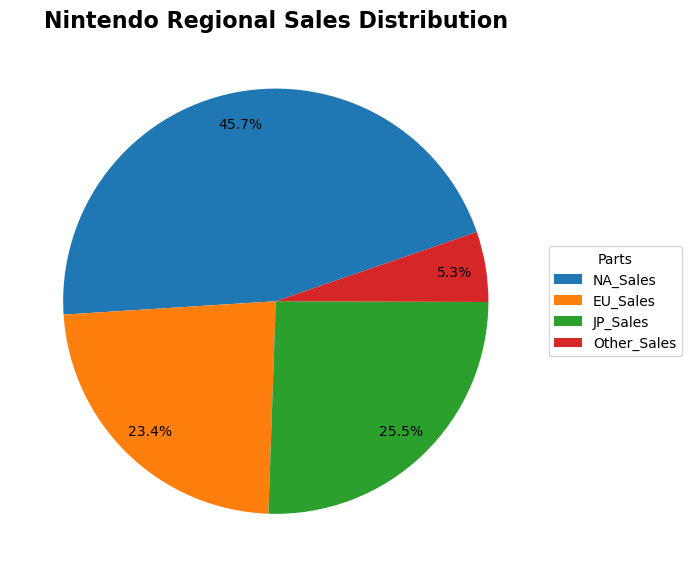

In [50]:
# Nintendo Regional Sales Distribution

nintendo = vg_sales[vg_sales['Publisher'] == 'Nintendo'][vg_sales.columns[6:10]].sum().round(2)

plt.figure(figsize = (7, 7))
plt.pie(nintendo.values , labels = None , autopct = '%.1f%%' ,pctdistance=0.85, startangle = 19)
plt.legend(nintendo.index, title="Parts", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Nintendo Regional Sales Distribution", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


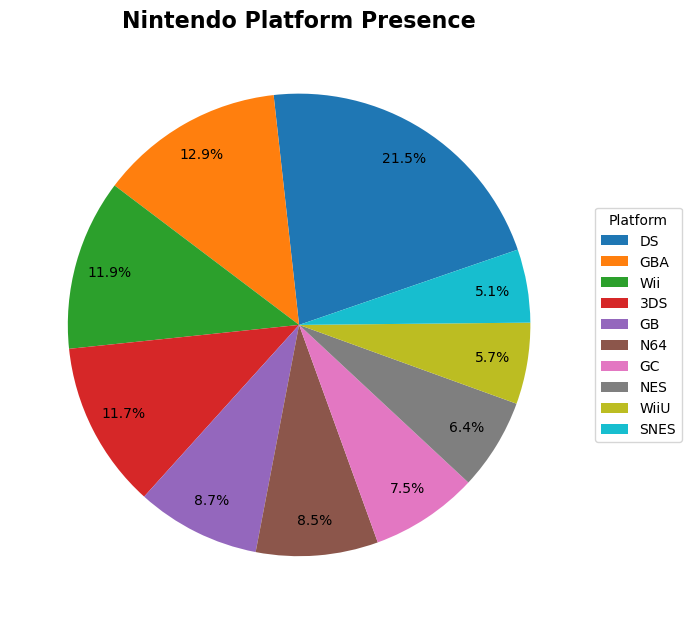

In [51]:
# Nintendo Platform Presence

nintendo_platforms = vg_sales[vg_sales['Publisher'] == 'Nintendo']['Platform'].value_counts()

plt.figure(figsize = (7, 7))
plt.pie(nintendo_platforms.values , labels = None , autopct = '%.1f%%' ,pctdistance=0.85, startangle = 19)
plt.legend(nintendo_platforms.index, title="Platform", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Nintendo Platform Presence", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


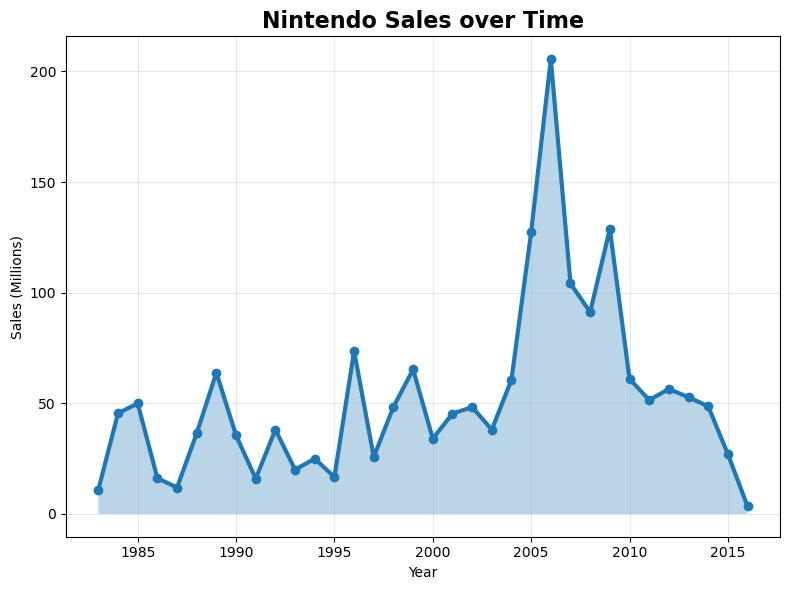

In [54]:
# Peak slales of Nintendo over time line

peak_nintendo = vg_sales[vg_sales['Publisher'] == 'Nintendo'].groupby('Year').Global_Sales.sum()

plt.figure(figsize = (8 , 6))
plt.plot(peak_nintendo.index , peak_nintendo.values , marker = 'o' , linewidth = 3 , markersize = 6)
plt.fill_between(peak_nintendo.index , peak_nintendo.values , alpha = 0.3)
plt.title('Nintendo Sales over Time' , fontweight = 'bold' , fontsize = 16)
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

Limitations:


This analysis is limited by data availability beyond 2016. Observed declines in sales after this period reflect missing data rather than true market performance.